**Homework 4- Problem 1-3**

In [1]:
!pip install d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
%matplotlib inline
!pip install matplotlib-inline
import sys
!{sys.executable} -m pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import time
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
%matplotlib inline
from torchvision import transforms
import torchvision.datasets as datasets
from torchvision import datasets, transforms
import torch.optim as optim
from d2l import torch as d2l
from torch.optim import lr_scheduler

In [4]:
class RNN(d2l.Module): 
    def __init__(self, num_inputs, num_hiddens, dropout):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens, dropout=dropout)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

In [5]:
class RNNLM(d2l.RNNLMScratch):  
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

In [6]:
data = d2l.TimeMachine(batch_size=256, num_steps=40)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=40, dropout=0.5)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=0.5)
model.predict('it has', 30, data.vocab)

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


'it hasccmmccmmccmmccmmccmmccmmccmmcc'

In [7]:
model

RNNLM(
  (rnn): RNN(
    (rnn): RNN(28, 40, dropout=0.5)
  )
  (linear): Linear(in_features=40, out_features=28, bias=True)
)

In [8]:
pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from torchinfo import summary
batch_size = 256
summary(model)

Layer (type:depth-idx)                   Param #
RNNLM                                    --
├─RNN: 1-1                               --
│    └─RNN: 2-1                          2,800
├─Linear: 1-2                            1,148
Total params: 3,948
Trainable params: 3,948
Non-trainable params: 0

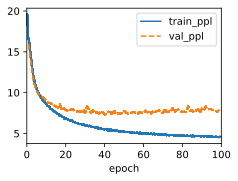

In [10]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [11]:
model.predict('it has', 50, data.vocab, d2l.try_gpu())

'it has so his and that we the prace at a can at a for a '

In [12]:
model.predict('it has', 100, data.vocab, d2l.try_gpu())

'it has so his and that we the prace at a can at a for a moued we ingin time travel the time the time there'

In [13]:
model.predict('it has', 200, data.vocab, d2l.try_gpu())

'it has so his and that we the prace at a can at a for a moued we ingin time travel the time the time there was of the traveller ant mas of the traveller ant mas of the traveller ant mas of the traveller ant'